# Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd


import matplotlib.pyplot as plt

from tqdm import tqdm

import keijzer_exogan as ke

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

# Load chunk
X[0] is a dict from regular chunk  
X[0][0] is a dict from .npy selection  

In [2]:
%%time
dir_ = '/datb/16011015/ExoGAN_data//'

X = np.load(dir_+'selection/last_chunks_25_percent.npy')

X = X.flatten()
np.random.shuffle(X) # note that X = np.rand.... isn't required
X = X[:5000]
print('Len X: ', len(X))
np.random.seed(23) # Set seed for the np.random functions

# Shuffle X along the first axis to make the order of simulations random


wavelengths = ke.load_wavelengths()

Len X:  5000
CPU times: user 40.8 s, sys: 8.57 s, total: 49.3 s
Wall time: 49.4 s


## Test ASPA run

100%|██████████| 32/32 [00:07<00:00,  2.71it/s]


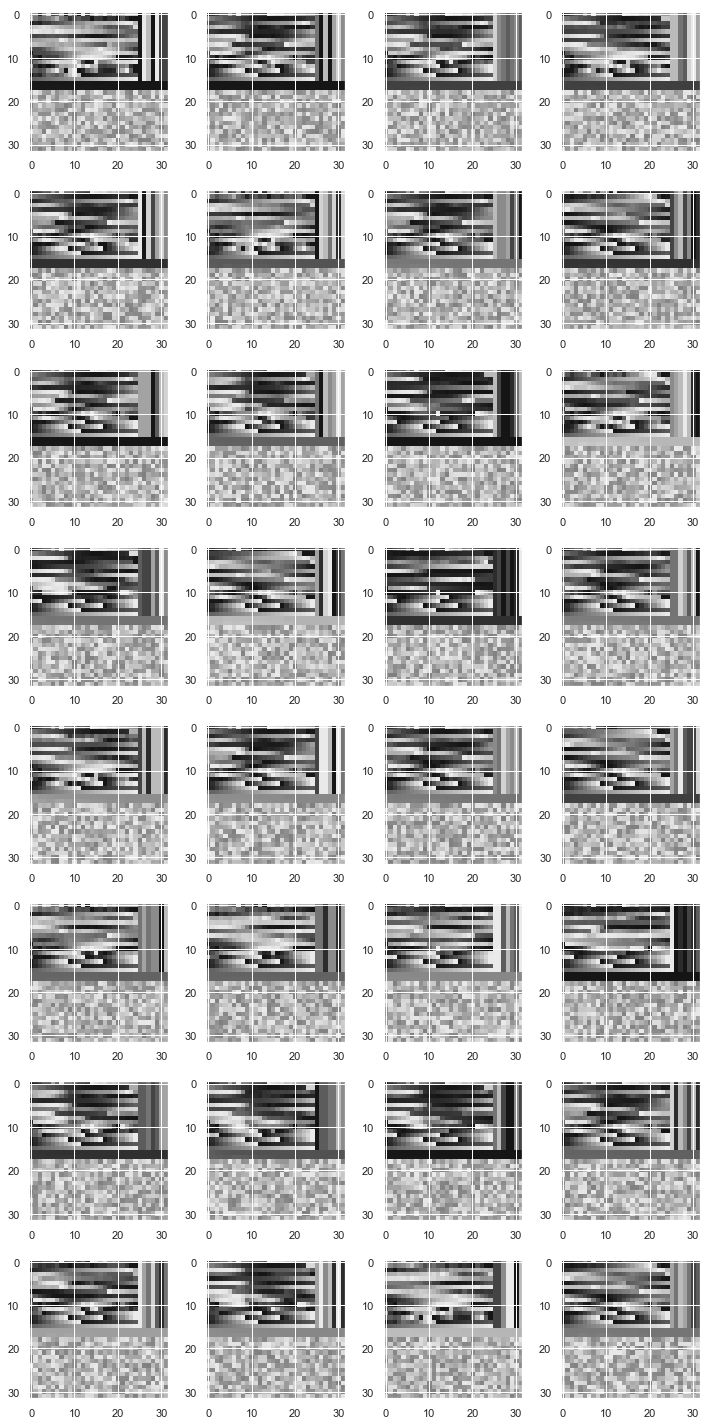

In [3]:
plt.figure(figsize=(10,20))

for i in tqdm(range(8*4)):
    image = ke.ASPA_v4(X[i], wavelengths)
    

    plt.subplot(8, 4, i+1)
    plt.imshow(image, cmap='gray', vmin=-1.2, vmax=1.2)
    plt.tight_layout()

# Creating images from all simulations in the chunk

In [4]:
from multiprocessing import Pool

In [5]:
data = [(X[i], wavelengths) for i in tqdm(range(len(X)))] # input to f must be a tuple

100%|██████████| 5000/5000 [00:00<00:00, 1397076.81it/s]


In [6]:
def f(t):
    X_i , wavelengths = t
    image = ke.ASPA_v4(X_i, wavelengths)
    image = image.reshape(1,32,32)
    return image

In [7]:
%%time
pool = Pool() # server has 2x 12 cores -> Pool(processes=24)
results = pool.map(f, data, chunksize=1)

CPU times: user 1.44 s, sys: 11.4 s, total: 12.8 s
Wall time: 14.4 s


In [8]:
%%time
pool.close()
pool.join()
pool.terminate() # not nice but meh, pool.join() gets stuck... https://stackoverflow.com/questions/15314189/python-multiprocessing-pool-hangs-at-join

CPU times: user 2.52 ms, sys: 967 µs, total: 3.49 ms
Wall time: 978 ms


In [9]:
len(results)

5000

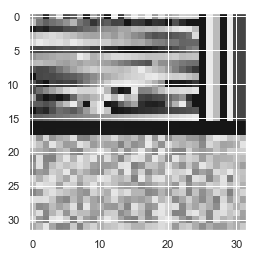

In [10]:
plt.imshow(results[0][0, :, :], cmap='gray', vmin=-1.2, vmax=1.2)

In [11]:
%%time
images = np.array(results)

CPU times: user 13.3 ms, sys: 12.5 ms, total: 25.9 ms
Wall time: 25.2 ms


In [12]:
# Sanity check

In [13]:
images.shape

(5000, 1, 32, 32)

In [14]:
decoded_params = [ke.decode_params_from_aspa(image[0]) for image in images]

pd.DataFrame.from_dict(decoded_params).nunique()

ch4_mixratio     10
co2_mixratio     10
co_mixratio      10
h2o_mixratio     10
planet_mass       1
planet_radius     4
temp_profile     10
dtype: int64

In [15]:
aspa = ke.ASPA_v4(X[0], wavelengths)
ke.decode_params_from_aspa(aspa)

{'ch4_mixratio': -7.888888888888889,
 'co2_mixratio': -7.968253968253968,
 'co_mixratio': -7.968253968253968,
 'h2o_mixratio': -7.857142857142857,
 'planet_mass': 1.5184e+27,
 'planet_radius': 55928800.0,
 'temp_profile': 1000.001}

In [16]:
original_params = X[0]['param']

for param in original_params.keys:
    if 

{'ch4_mixratio': 0.0027825594022071257,
 'co2_mixratio': 3.5938136638046254e-07,
 'co_mixratio': 3.5938136638046254e-07,
 'h2o_mixratio': 0.1,
 'planet_mass': 1.5184e+27,
 'planet_radius': 55928800.0,
 'temperature_profile': 2000.0}

# Saving this array to disk

In [ ]:
%%time
np.save(dir_+'selection/last_chunks_25_percent_images_v4.1.npy', images)

# Test loading and visualization

In [ ]:
images = np.load(dir_+'selection/last_chunks_25_percent_images_v4.1.npy')

In [ ]:
images.shape

In [ ]:
plt.imshow(images[0,0,:,:], cmap='gray', vmin=-1.2, vmax=1.2)

In [ ]:
plt.figure(figsize=(10,20))

for i in range(8*4):
    plt.subplot(8, 4, i+1)
    plt.imshow(images[i,0,:,:], cmap='gray', vmin=-1.2, vmax=1.2)
    plt.tight_layout()

In [ ]:
print('done')